# Problem 2

Use this notebook to write your code for problem 2. You may reuse your SGD code from last week.

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
%matplotlib inline

The following function may be useful for loading the necessary data.

In [6]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

In [174]:
def loss(X, Y, w):
    '''
    Calculate the average log loss over dataset.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    return -1 * np.average(np.log(1 / (1 + np.exp(- 1 * Y * np.dot(X, w)))))


def gradient(x, y, w, lam, N):
    '''
    Calculate the gradient of the regularized logistic error with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        lam: An integer value of the regularization parameter lambda
        N: An integer value of the sample size
        
    Output:
        The gradient of the loss with respect to x, y, and w. 
    '''

    return -1 * y * x / (1 + np.exp(y * np.dot(w, x))) + (2 * lam / N) * w


def SGD(X, Y, w_start, eta, N_epochs, lam):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        lam: An integer value of the regularization parameter lambda.
        
    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
    '''
    
    # N is number of data points
    N = np.size(X, 0)
    w = w_start

    for epoch in range(N_epochs):
        # Go through each point and update
        for i in np.random.permutation(N):
            w -= eta * gradient(X[i], Y[i], w, lam, N)
        
    return w

In [170]:
# Prepare training set 1
data1 = load_data('data/wine_training1.txt')
X1 = data1[:, 1:]
Y1 = data1[:, 0]

# Normalize X1
X1_mean = np.mean(X1, axis=0)
X1_std = np.std(X1, axis=0)
X1 = (X1 - X1_mean) / X1_std

# Add bias term
X1 = np.insert(X1, 0, 1, axis=1)


# Prepare training set 2
data2 = load_data('data/wine_training2.txt')
X2 = data2[:, 1:]
Y2 = data2[:, 0]

# Normalize X2
X2_mean = np.mean(X2, axis=0)
X2_std = np.std(X2, axis=0)
X2 = (X2 - X2_mean) / X2_std

# Add bias term
X2 = np.insert(X2, 0, 1, axis=1)


# Prepare test set
test_data = load_data('data/wine_testing.txt')
X_test = test_data[:, 1:]
Y_test = test_data[:, 0]

# Normalize test set and add bias term
X_test1 = np.insert((X_test - X1_mean) / X1_std, 0, 1, axis=1)
X_test2 = np.insert((X_test - X2_mean) / X2_std, 0, 1, axis=1)

In [183]:
D = np.size(X1, 1)
eta = 5e-4
N_epochs = 20000
lambdas = [1e-5 * 5 ** i for i in range(15)]

w1_vals = [SGD(X1, Y1, np.random.random(D) / 100, eta, N_epochs, lam) for lam in lambdas]
w1_train_errors = [loss(X1, Y1, w) for w in w1_vals]
w1_test_errors = [loss(X_test1, Y_test, w) for w in w1_vals]
w1_norms = [linalg.norm(w) for w in w1_vals]

w2_vals = [SGD(X2, Y2, np.random.random(D), eta, N_epochs, lam) for lam in lambdas]
w2_train_errors = [loss(X2, Y2, w) for w in w2_vals]
w2_test_errors = [loss(X_test2, Y_test, w) for w in w2_vals]
w2_norms = [linalg.norm(w) for w in w2_vals]

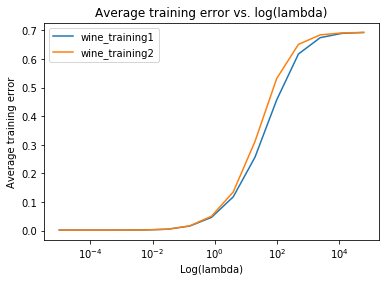

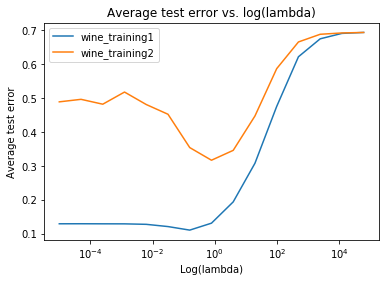

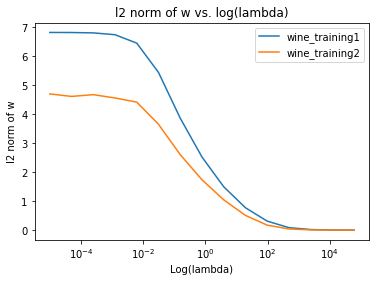

In [184]:
# C.i
plt.figure()
plt.plot(lambdas, w1_train_errors)
plt.plot(lambdas, w2_train_errors)
plt.xscale('log')
plt.title('Average training error vs. log(lambda)')
plt.xlabel('Log(lambda)')
plt.ylabel('Average training error')
plt.legend(['wine_training1', 'wine_training2'], loc = 'best')
plt.show()

# C.ii
plt.figure()
plt.plot(lambdas, w1_test_errors)
plt.plot(lambdas, w2_test_errors)
plt.xscale('log')
plt.title('Average test error vs. log(lambda)')
plt.xlabel('Log(lambda)')
plt.ylabel('Average test error')
plt.legend(['wine_training1', 'wine_training2'], loc = 'best')
plt.show()

# C.iii
plt.figure()
plt.plot(lambdas, w1_norms)
plt.plot(lambdas, w2_norms)
plt.xscale('log')
plt.title('l2 norm of w vs. log(lambda)')
plt.xlabel('Log(lambda)')
plt.ylabel('l2 norm of w')
plt.legend(['wine_training1', 'wine_training2'], loc = 'best')
plt.show()